# Exercise 0: Exploratory Data Analysis (EDA)

### Dataset Description
This dataset includes various property metrics crucial for analyzing real estate sales, features, and pricing. Dataset comes from Real Estate Transaction Records. Our object is to predict **SalePrice**.

- **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms)
- **KitchenAbvGr**: Kitchens above grade
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Fireplaces**: Number of fireplaces
- **GarageYrBlt**: Year garage was built
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **MiscVal**: Value of miscellaneous feature
- **MoSold**: Month Sold (MM)
- **YrSold**: Year Sold (YYYY)
- **SalePrice**: Price of sale (target variable)


### Data Collection

In [20]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [21]:
import pandas as pd
df =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Dataset Overview

In [23]:
df

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

In [25]:
df[df.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


In [26]:
df.describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [27]:
print("\nDuplicate rows:")
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


**Insight:**

- The dataset contains 1068 rows and 17 columns.
- The dataset contains 3 missing values.
- The dataset contains a duplicate rows.
- Missing or Erroneous Data: The GarageYrBlt column has a value of -1.0, there are also some other missing data in the dataset, which suggests missing or erroneous data that needs to be addressed.
- Some colomns need to change the type of data: GarageCars needs to change the labels and the others need to change the type of data. 
- Continuous Variables: All the columns can be transfer into integer format and are continuous variables. They can be useful for statistical summaries and visualizations.

#### Clean the data
**Steps:**

- Drop the duplicates.
- Fill the NA with -1 first, then set all value of -1 into the median of its column.
- Transfer all the data into int64 format.

In [28]:
#change the label of "GarageCars" into integer
df.loc[df["GarageCars"]=='zero',"GarageCars"]=0
df.loc[df["GarageCars"]=='one',"GarageCars"]=1
df.loc[df["GarageCars"]=='two',"GarageCars"]=2
df.loc[df["GarageCars"]=='three',"GarageCars"]=3
df.loc[df["GarageCars"]=='four',"GarageCars"]=4
#drop duplicates
df=df.drop_duplicates()
#fill all nan with value -1
df["GarageCars"]=pd.to_numeric(df["GarageCars"])
df.fillna(-1,inplace=True)
df.loc[df['TotRmsAbvGrd']==-1,'TotRmsAbvGrd']=df['TotRmsAbvGrd'].median()
df.loc[df['GarageYrBlt']==-1,'GarageYrBlt']=df['GarageYrBlt'].median()
df.loc[df['GarageCars']==-1,'GarageCars']=df['GarageCars'].median()
df.loc[df['YrSold']==-1,'YrSold']=df['YrSold'].median()
#transfer all the values to integers
df['TotRmsAbvGrd']=df['TotRmsAbvGrd'].astype('int64')
df['GarageYrBlt']=df['GarageYrBlt'].astype('int64')
df['YrSold']=df['YrSold'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1167 non-null   int64  
 1   KitchenAbvGr   1167 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   int64  
 3   Fireplaces     1167 non-null   int64  
 4   GarageYrBlt    1167 non-null   int64  
 5   GarageCars     1167 non-null   float64
 6   GarageArea     1167 non-null   int64  
 7   WoodDeckSF     1167 non-null   int64  
 8   OpenPorchSF    1167 non-null   int64  
 9   EnclosedPorch  1167 non-null   int64  
 10  3SsnPorch      1167 non-null   int64  
 11  ScreenPorch    1167 non-null   int64  
 12  PoolArea       1167 non-null   int64  
 13  MiscVal        1167 non-null   int64  
 14  MoSold         1167 non-null   int64  
 15  YrSold         1167 non-null   int64  
 16  SalePrice      1167 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 164.1 KB


C:\Users\huang\AppData\Local\Temp\ipykernel_19016\608760590.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GarageCars"]=pd.to_numeric(df["GarageCars"])
C:\Users\huang\AppData\Local\Temp\ipykernel_19016\608760590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(-1,inplace=True)
C:\Users\huang\AppData\Local\Temp\ipykernel_19016\608760590.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

**Insights:**
- Finally dataset have 1167 raws and 17 columns without missing data.

#### Distribution of Numerical Features

In [29]:
print("\nSummary Statistics:")
print(f"Number different values per column\n{df.nunique()}")
df.describe()


Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       97
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,2.872322,1.043702,6.497001,0.608398,1977.888603,1.756641,469.197087,92.054841,46.305913,23.627249,2.784919,15.714653,2.380463,39.754927,6.338475,2007.803770,179205.974293
std,0.806266,0.212740,1.618329,0.630852,24.120046,0.739063,210.700914,123.471799,67.208565,62.330049,23.919014,57.539516,36.493533,489.321936,2.692551,1.326619,76868.135257
min,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,324.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161750.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,66.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212500.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000



Histograms of numerical features:


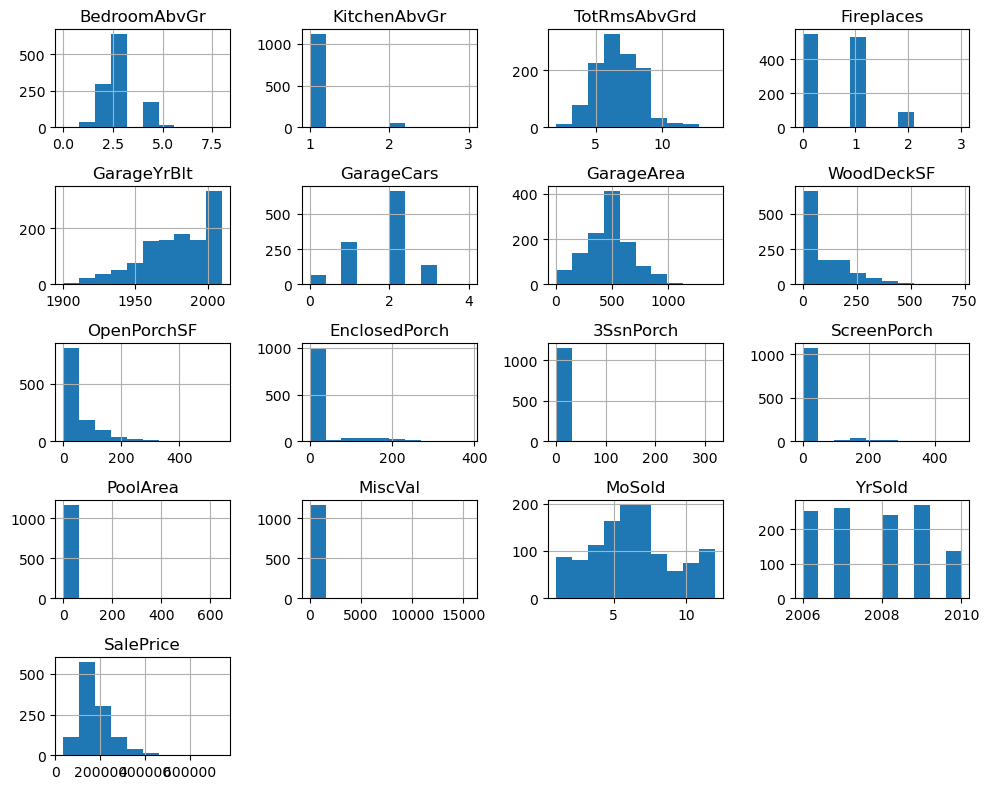

In [30]:
print("\nHistograms of numerical features:")
df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

**Insight:**

1. BedroomAbvGr: 
- These houses has about 2.8 bedrooms above grade,
- Most bedrooms numbers are around 2.5.
2. KitchenAbvGr:
- In most cases, one house owns 1 kitchens above grade.
- In few cases, one houses own 2 or 3 kitchens.
3. TotRmsAbvGrd: 
- The mean of total rooms above grade is about 6.5, with the standard deviation of 1.632.
- The distrubution of total rooms above grade is right-skewed with a peak at 6.
4. Fireplaces: 
- The mean number of fireplaces is 0.6.
- Most houses own 0 or 1 fireplaces, few houses own more than 1 fireplaces.
5. GarageYrBlt: 
- The mean of Year garage was built is about 1867. 
- With the standard deviation of 454, the years of construction have big differences.
- There has one missing data on this imformation.
6. GarageCars: 
- The garage can stop 1.75 car per house on average.
- Most garage can stop 2 cars, and this distrubution is left-skewed.
7. GarageArea: 
- The size of garage follow a normal distribution with mean of 469 and the standard deviation of 210 (feet).
- The largest garage area can reach 1418 square feet.
8. WoodDeckSF: 
- The Wood deck area follow a exponential distribution with mean of 92 square feet.
- Some houses don't have this area.
9. OpenPorchSF: 
- The Open porch area follow a exponential distribution with mean of 46 square feet.
- Some houses don't have this area. 
10. EnclosedPorch: 
- The mean enclosed porch area is about 24 square feet. 
- Most houses don't have this area.
11. 3SsnPorch: 
- Three season porch area is about 2.78 square feet on average. 
- Almost all the houses don't have this area.
12. ScreenPorch: 
- The mean screen porch area is about 15.7 square feet ,
- Most houses don't have this area.
13. PoolArea:
- The mean pool area is 2.37 square feet.
- Almost all the houses don't have this area.
14. MiscVal: 
- Value of miscellaneous feature is about 489, and there's a big difference between values.
- Almost all the houses don't have this value.
15. MoSold: 
- The distribution of sold month is quite balanced, and reach a summit in June.
16. YrSold: 
- The houses are sold around the year of 2006, compared with its years of garbage construction, the differences are much smaller.
- There's a missing data
17. SalePrice: 
- The sale price follows a right-skewed distribution with the mean of 179164 and the standard deviation of 76848.
- The cheapest is 34900 and the largest is 745000. There's a difference of about 20 times.

#### Outlier Detection


Box plots to check for outliers:


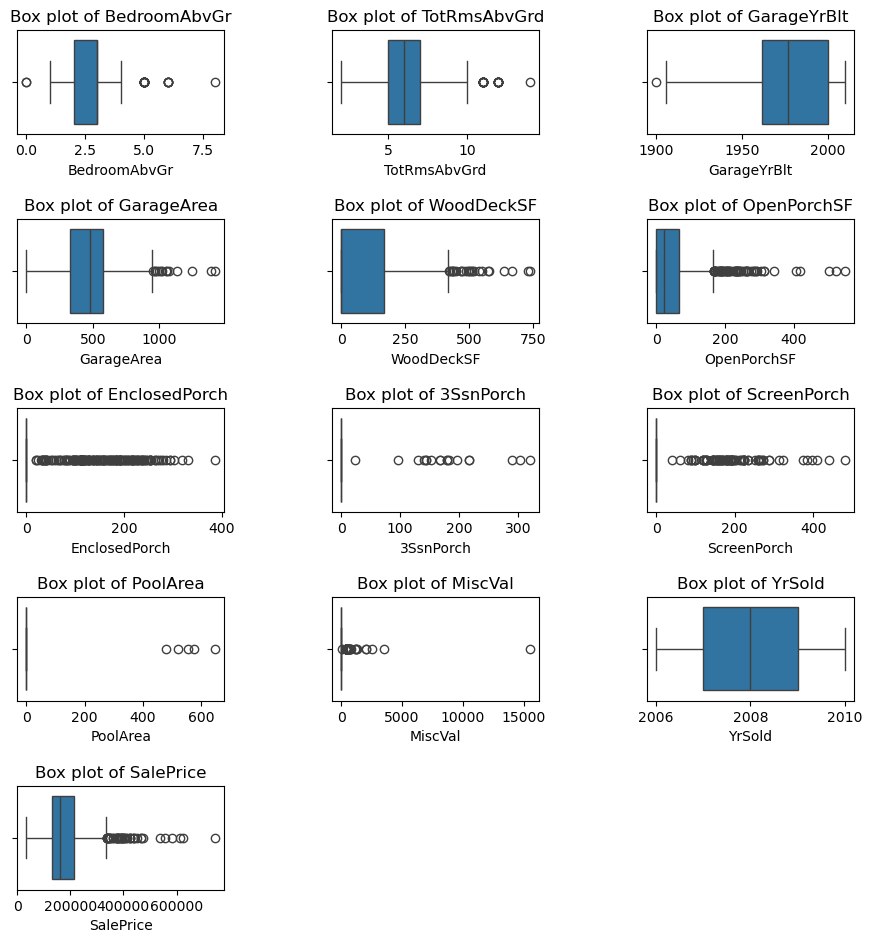

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Box plots for numerical variables to check outliers
print("\nBox plots to check for outliers:")
numeric_cols = ['BedroomAbvGr','TotRmsAbvGrd','GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','YrSold', 'SalePrice']

# Set up the plot grid
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*2))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

**Insight:**

1. BedroomAbvGr:
- The distribution of bedrooms above grade shows some outliers, with value 0 or above 4.

2. TotRmsAbvGrd:
- There are a few outliers, with total rooms above grade more than 10.

3. GarageYrBlt:
- There are few houses which has garage build since 1900.

4. GarageArea:
- There are some outlers own a garage of over 1000 square feet.

5. WoodDeckSF:
- There are some outlers have the wood deck area of over 500 square feet.

6. OpenPorchSF:
-  There are a lot of outlers with the open porch area over 200.

7. EnclosedPorch:
- Most houses don't have enclosed porch, so houses with enclosed porch are all outlers.

8. 3SsnPorch:
- Most houses don't have three season porch, so houses with three season porch are all outlers.

9. ScreenPorch:
- Most houses don't have screen porch, so houses with screen porch are all outlers.

10. PoolArea:
- Most houses don't have pool, so houses with pool are all outlers.

11. MiscVal
- Most houses don't have value of miscellaneous feature, so houses with this value are all outlers.

12. YrSold
- These dataset collect the houses saled from 2006 to 2010, and there's no outler.

13. SalePrice
- There are a lot of outlers with sale price over 300000.

#### Correlation Analysis


Correlation matrix:


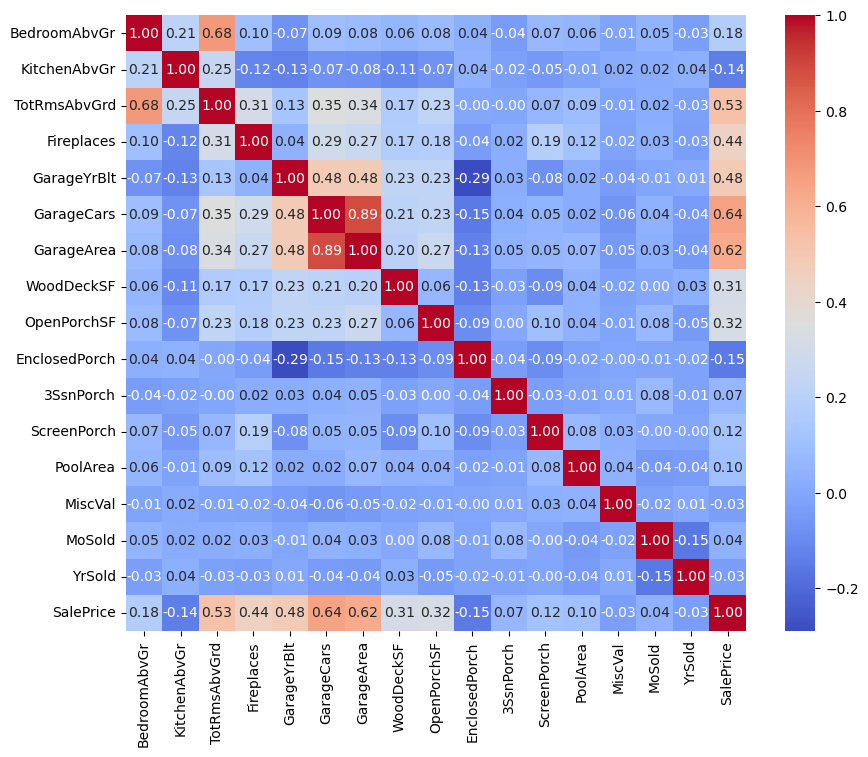

In [32]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Insight:**


1. BedroomAbvGr: 
- Positive correlation with TotRmsAbvGrd (0.68): More bedrooms above stage implie more total rooms above stage.

2. TotRmsAbvGrd: 
- Positive correlation with TotRmsAbvGrd (0.68): Houses with more total rooms usually have more bedrooms above stage.
- Positive correlation with Fireplaces (0.31): Houses with more total rooms above stage sometimes have more fireplaces.
- Positive correlation with Garagecars (0.35): Houses with more total rooms above stage sometimes have more car capacity.
- Positive correlation with GarageArea (0.34): Houses with more total rooms above stage sometimes have more garage area.
- Positive correlation with SalePrice (0.53): Houses with more total rooms above stage have higher price.

4. Fireplaces: 
- Positive correlation with SalePrice (0.44): Houses with more fireplaces have higher price.

5. GarageYrBlt: 
- Positive correlation with GarageCars (0.48): The later the garage was built, the greater car capacity the house has. 
- Positive correlation with GarageArea (0.48): The later the garage was built, the more garage area the house has.
- Positive correlation with SalePrice (0.48): The later the garage was built, the greater sale price the house has.
- Negative correlation with EnclosedPorch (-0.29): The later the garage was built, the less enclosed porch area the house has.

6. GarageCars: 
- Positive correlation with GarageYrBlt (0.48): The later the garage was built, the greater car capacity the house has. 
- Positive correlation with GarageArea (0.89): The car capacity and the area of a garage are highly correlated.
- Positive correlation with SalePrice (0.64): The houses with a garage which can store more cars are more expensive.

7. GarageArea: 
- Positive correlation with GarageYrBlt (0.48): The later the garage was built, the greater car capacity the house has. 
- Positive correlation with GarageCars (0.89): The car capacity and the area of a garage are highly correlated.
- Positive correlation with SalePrice (0.62): The houses with a greater garage area are more expensive.

8. WoodDeckSF: 
- Positive correlation with SalePrice (0.31): The houses with more wood deck area are more expensive.

9. OpenPorchSF: 
- Positive correlation with SalePrice (0.32): The houses with more open porch area are more expensive.

10. EnclosedPorch: 
- Negative correlation with GarageYrBlt(-0.29): The houses with more enclosed porch area sometimes have older garage.

11. SalePrice: 
- Positive correlation with TotRmsAbvGrd (0.53): The houses with more rooms above stage are more expensive.
- Positive correlation with Fireplaces (0.44): The houses with more fireplaces are more expensive.
- Positive correlation with GarageYrBlt (0.48): The houses with a newer garage are more expensive.
- Positive correlation with GarageCars (0.64): The houses with a greater car capacity are more expensive.
- Positive correlation with GarageArea (0.62): The houses with a greater garage area are more expensive.
- Positive correlation with WoodDeckSF (0.31): The houses with more wood deck area are more expensive.
- Positive correlation with OpenPorchSF (0.32): The houses with more open porch area are more expensive.



Important correlations with 'SalePrice':


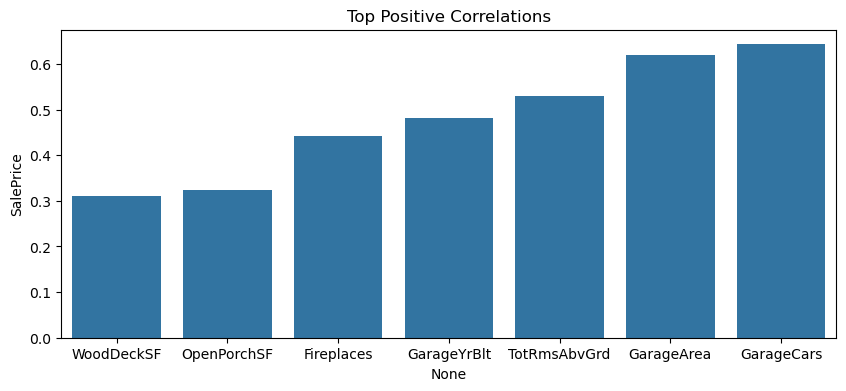

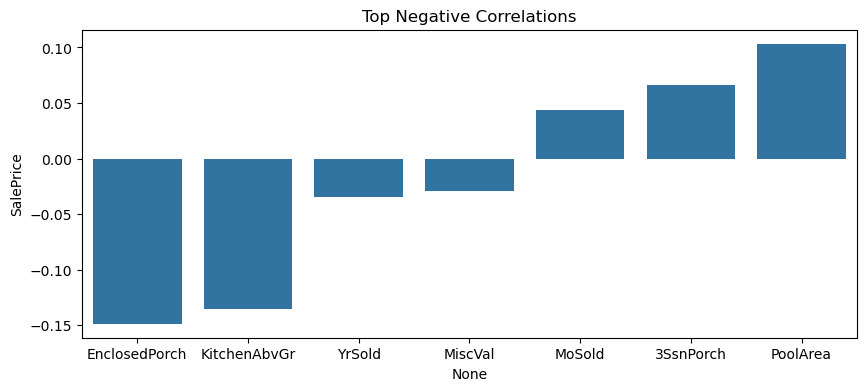

In [33]:
#### Important Correlations with 'Survived'
print("\nImportant correlations with 'SalePrice':")
corrs = df.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-7:]
corrs_min = corrs[:7]
fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")
plt.show()


Pairplot of selected features:


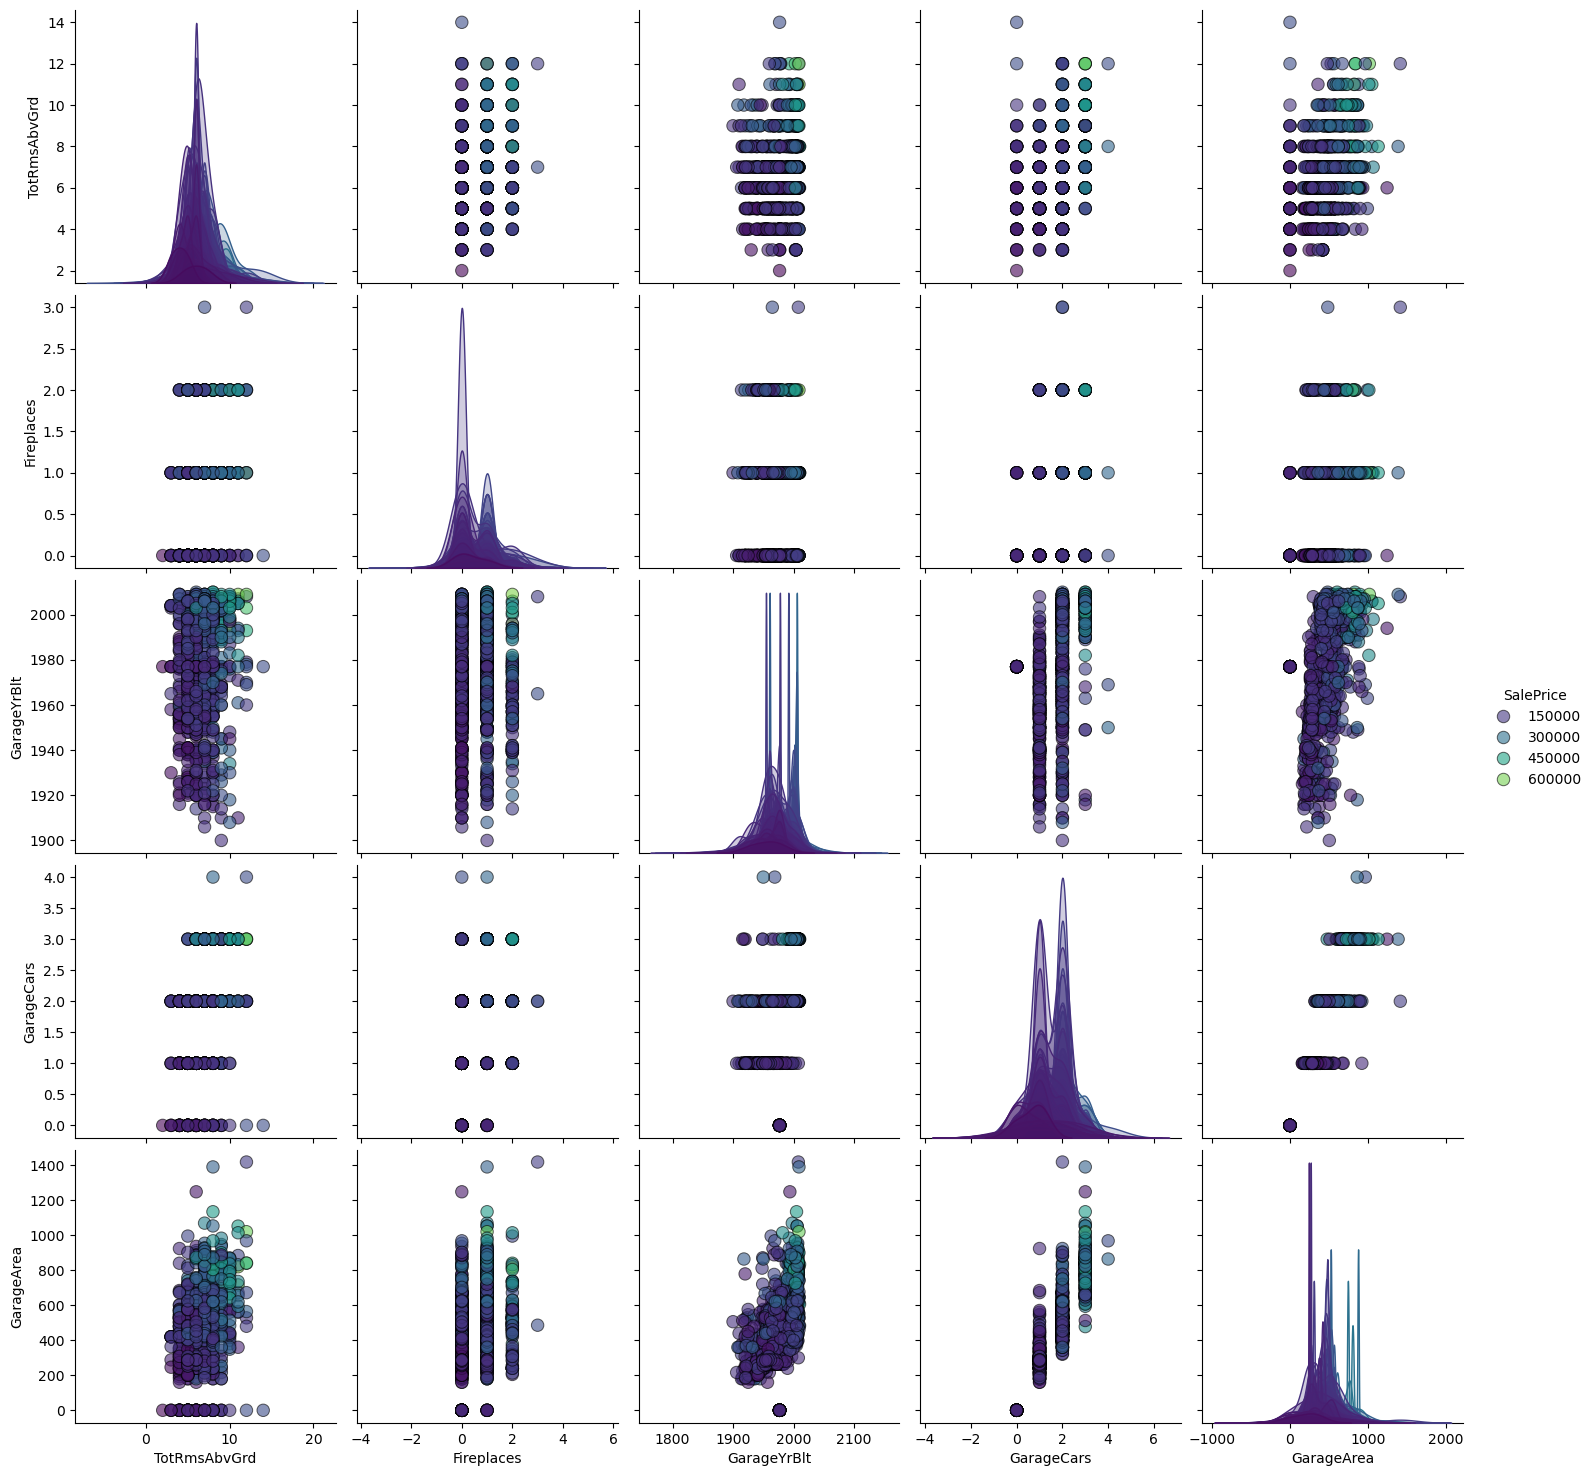

In [34]:
# Pairplot for pairwise relationships in the dataset
print("\nPairplot of selected features:")
selected_features = [ 'TotRmsAbvGrd', 'Fireplaces','GarageYrBlt', 'GarageCars','GarageArea','SalePrice']

# Creating pairplot
sns.pairplot(df[selected_features], hue='SalePrice', palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)
plt.show()

**Insight:**

1. TotRmsAbvGrd vs. SalePrice:

- The distribution of total rooms above stage of highest SalePrice are on the right of other classes; Houses with higher price usually have more rooms in distributions.
- Most houses are cheaper and have less rooms.
2. Fireplaces vs. SalePrice:

- The distribution of fireplaces pf different classes of sale price are distinct.
- Most houses don't have fireplaces and they are cheaper; More fireplace the house hve, higer price they have.
3. GarageYrBlt vs. SalePrice:

- The houses with newer garage are mostly more expensive.
4. GarageCars vs. SalePrice:

- The houses with car capacity more than 2 are much more expensive, and only few houses satisfy this condition.
- Most houses have car capacity less or equal to 2, and they are mostly cheaper.
5. GarageArea vs. SalePrice:

- The class of cheapest price has garage area around 300 square feet on average.
- The median class of price has garage area around 500 square feet on average.
- The class of highest price has garage area more than 800 square feet on average.


#### Compare distribution of train and test data

In [35]:
X_test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   292 non-null    int64  
 1   KitchenAbvGr   292 non-null    int64  
 2   TotRmsAbvGrd   292 non-null    int64  
 3   Fireplaces     291 non-null    float64
 4   GarageYrBlt    292 non-null    float64
 5   GarageCars     292 non-null    object 
 6   GarageArea     292 non-null    int64  
 7   WoodDeckSF     292 non-null    int64  
 8   OpenPorchSF    292 non-null    int64  
 9   EnclosedPorch  291 non-null    float64
 10  3SsnPorch      292 non-null    int64  
 11  ScreenPorch    292 non-null    int64  
 12  PoolArea       292 non-null    int64  
 13  MiscVal        292 non-null    int64  
 14  MoSold         292 non-null    int64  
 15  YrSold         292 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 38.8+ KB


In [36]:
X_test.isnull().sum()

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [37]:
#change the label of "GarageCars" into integer
X_test.loc[X_test["GarageCars"]=='zero',"GarageCars"]=0
X_test.loc[X_test["GarageCars"]=='one',"GarageCars"]=1
X_test.loc[X_test["GarageCars"]=='two',"GarageCars"]=2
X_test.loc[X_test["GarageCars"]=='three',"GarageCars"]=3
X_test.loc[X_test["GarageCars"]=='four',"GarageCars"]=4
X_test["GarageCars"]=pd.to_numeric(X_test["GarageCars"])
#fill all nan with value -1
X_test.fillna(-1,inplace=True)
X_test.loc[X_test['Fireplaces']==-1,'Fireplaces']=X_test['Fireplaces'].median()
X_test.loc[X_test['EnclosedPorch']==-1,'EnclosedPorch']=X_test['EnclosedPorch'].median()
X_test.loc[X_test['GarageYrBlt']==-1,'GarageYrBlt']=X_test['GarageYrBlt'].median()
#transfer all the values to integers
X_test['Fireplaces']=X_test['Fireplaces'].astype('int64')
X_test['GarageYrBlt']=X_test['GarageYrBlt'].astype('int64')
X_test['EnclosedPorch']=X_test['EnclosedPorch'].astype('int64')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BedroomAbvGr   292 non-null    int64
 1   KitchenAbvGr   292 non-null    int64
 2   TotRmsAbvGrd   292 non-null    int64
 3   Fireplaces     292 non-null    int64
 4   GarageYrBlt    292 non-null    int64
 5   GarageCars     292 non-null    int64
 6   GarageArea     292 non-null    int64
 7   WoodDeckSF     292 non-null    int64
 8   OpenPorchSF    292 non-null    int64
 9   EnclosedPorch  292 non-null    int64
 10  3SsnPorch      292 non-null    int64
 11  ScreenPorch    292 non-null    int64
 12  PoolArea       292 non-null    int64
 13  MiscVal        292 non-null    int64
 14  MoSold         292 non-null    int64
 15  YrSold         292 non-null    int64
dtypes: int64(16)
memory usage: 38.8 KB


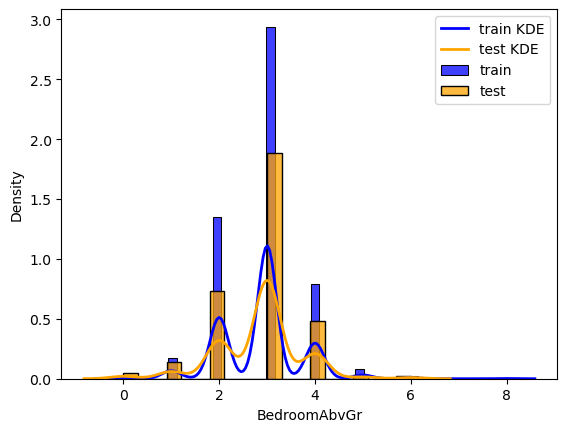

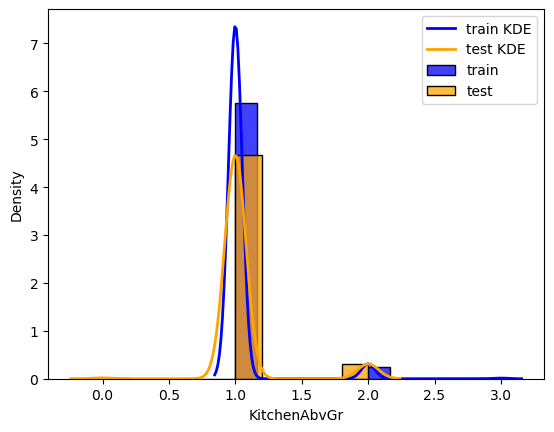

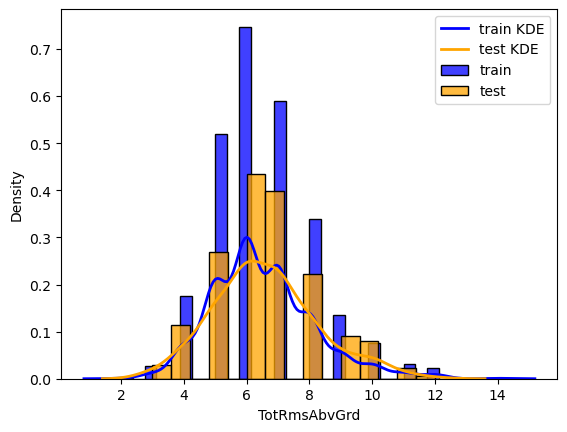

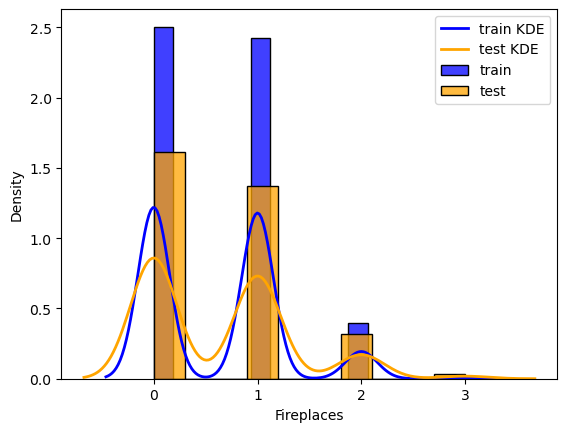

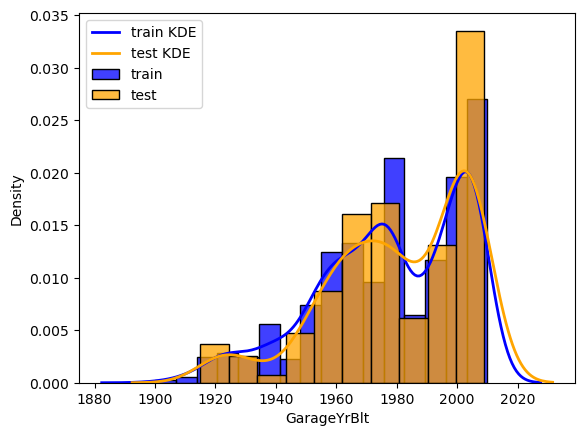

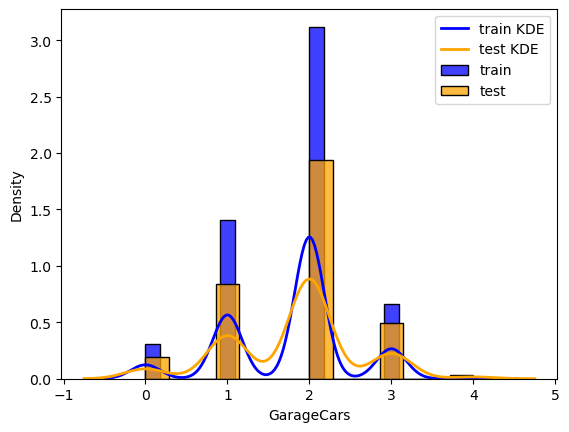

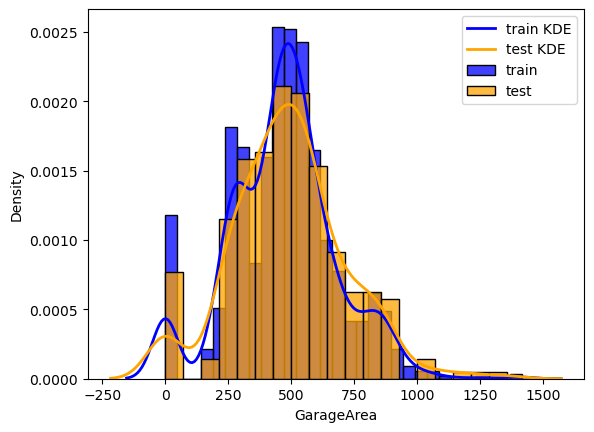

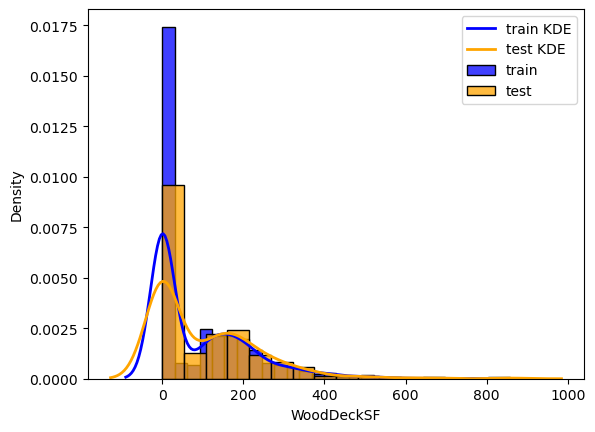

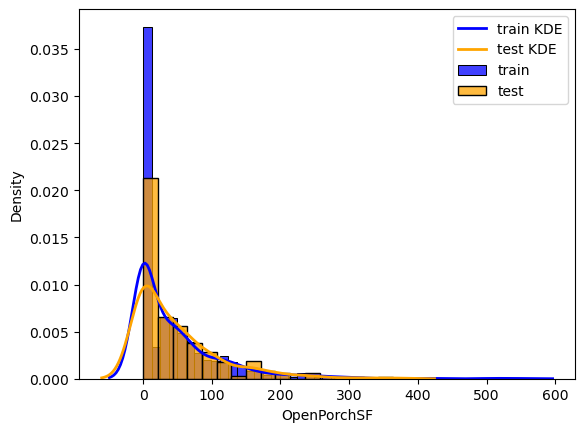

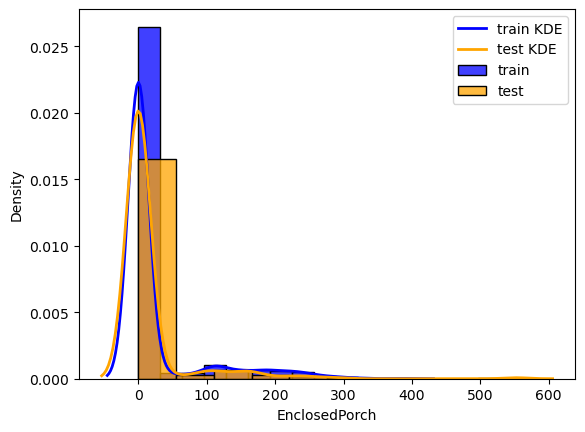

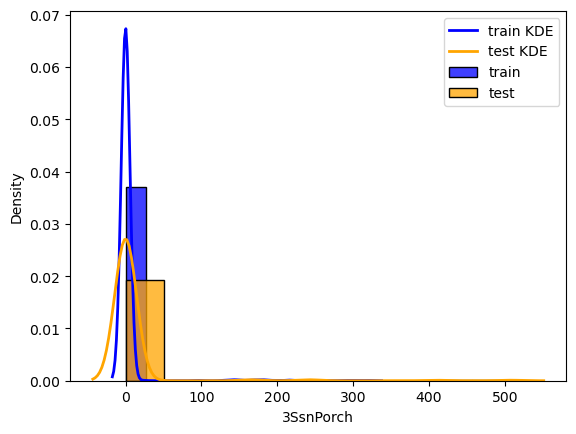

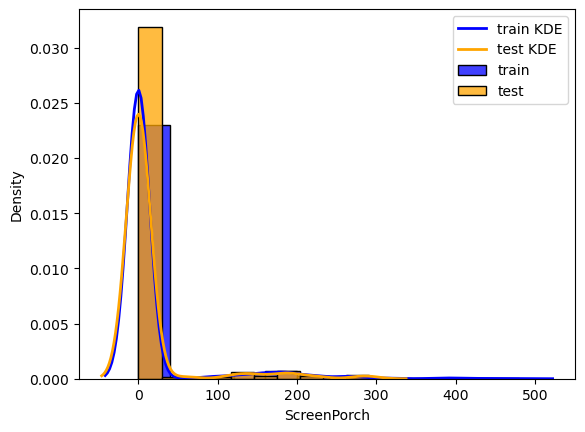

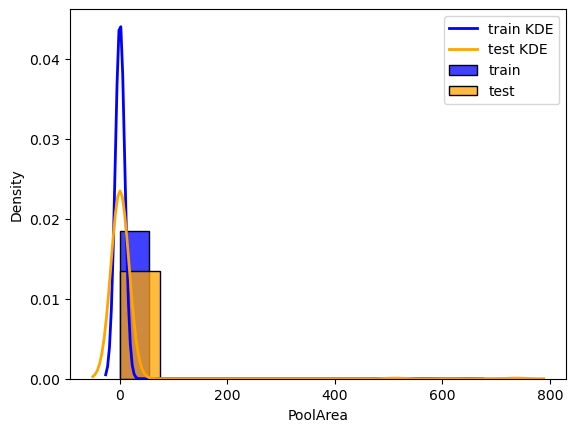

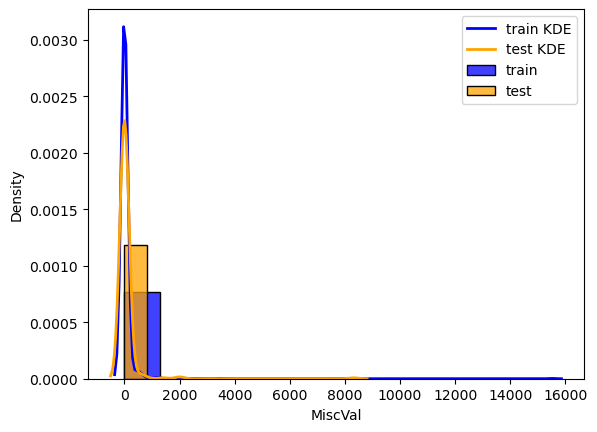

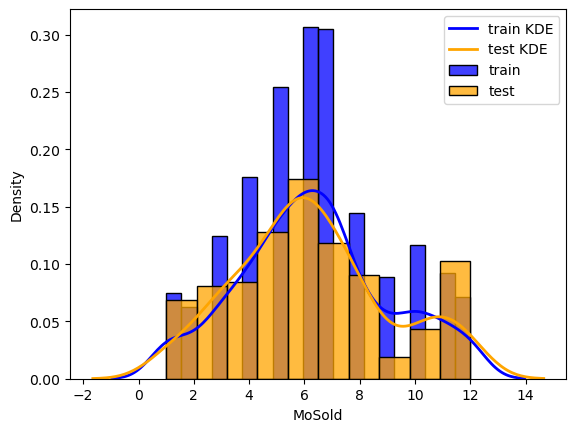

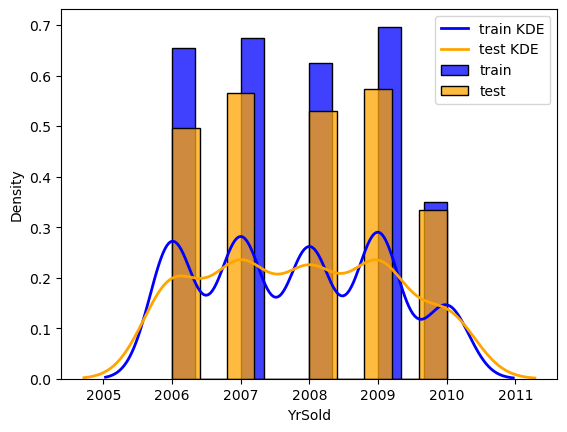

In [38]:
for col in X_test.columns:
    plt.figure()
    
    # Plot histograms for train and test
    sns.histplot(df[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
    
    # Overlay KDE plots for train and test
    sns.kdeplot(df[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
    
    plt.legend()
    plt.show()

**Insight:**

- The 1d density is similar from train to test.
- In general, train data are more concentrated than test data.